In [1]:
pip install matplotlib pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\shahr\anaconda3\python.exe -m pip install --upgrade pip


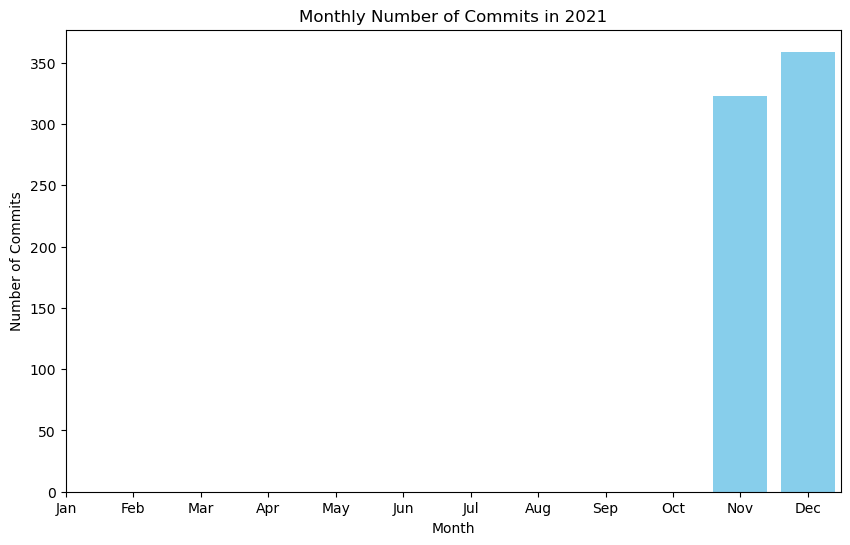

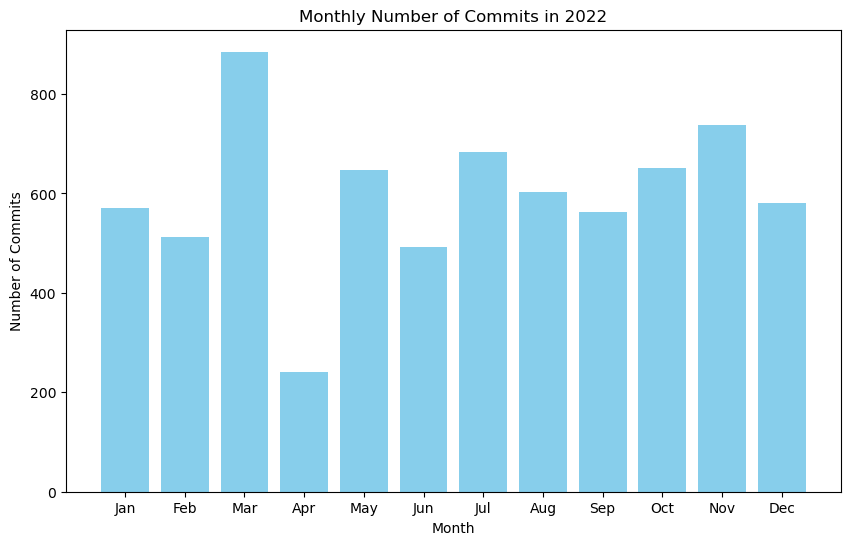

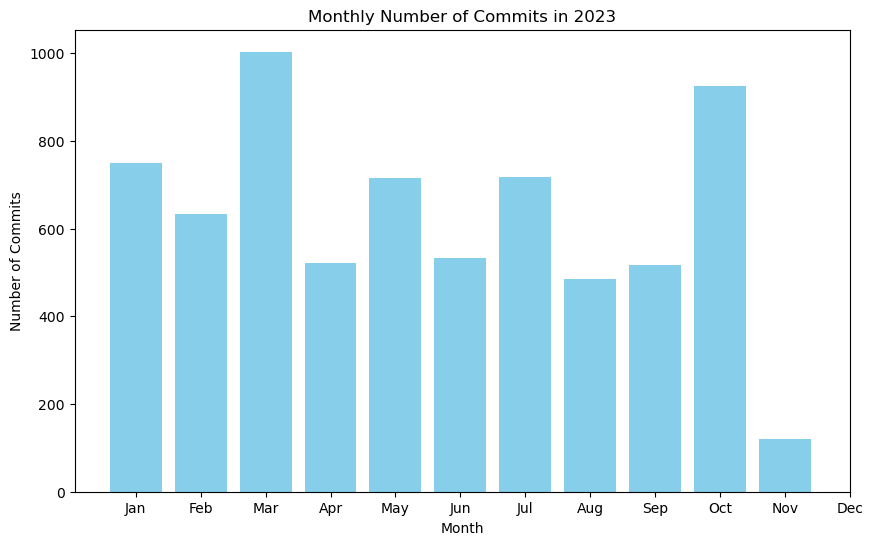

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the commit dataset
commit_df = pd.read_csv('kubernetes_commits.csv')

# Convert the commit_date column to datetime with format specified
commit_df['commit_date'] = pd.to_datetime(commit_df['commit_date'], format='%d/%m/%Y')

# Extract year and month from commit_time
commit_df['year'] = commit_df['commit_date'].dt.year
commit_df['month'] = commit_df['commit_date'].dt.month

# Group by year and month, count the number of commits
monthly_commit_counts = commit_df.groupby(['year', 'month']).size().reset_index(name='commit_count')

# Create three bar graphs for each year
for year in monthly_commit_counts['year'].unique():
    year_data = monthly_commit_counts[monthly_commit_counts['year'] == year]

    plt.figure(figsize=(10, 6))
    plt.bar(year_data['month'], year_data['commit_count'], color='skyblue')
    plt.title(f'Monthly Number of Commits in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Commits')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()
